In [157]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [158]:
fashion_minist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_minist.load_data()

In [159]:
train_images = train_images / 255
train_targets = train_images.copy()
test_images = test_images / 255
test_targets = test_images.copy()

In [160]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_targets, test_size=0.2)

In [161]:
class autoencoderForFashionMnist(keras.models.Model):
    def __init__(self, imgShape, dimension):
        super(autoencoderForFashionMnist, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Flatten(input_shape=imgShape), 
            keras.layers.Dense(dimension)
        ])

        self.decoder = keras.Sequential([
            keras.layers.InputLayer(input_shape=(dimension, )), 
            keras.layers.Dense(np.prod(imgShape)), 
            keras.layers.Reshape((imgShape))
        ])
        
    def call(self, inputs):
        encoding = self.encoder(inputs)
        decoding = self.decoder(encoding)
        return decoding

In [162]:
model1 = autoencoderForFashionMnist([28, 28], 64)

In [163]:
model1.encoder.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


In [164]:
model1.decoder.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 784)               50960     
                                                                 
 reshape_11 (Reshape)        (None, 28, 28)            0         
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [165]:
model1.compile(optimizer='adam', loss='mse', metrics=keras.metrics.MeanSquaredError())

In [166]:
history = model1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 7/10
1500/

In [167]:
loss, mse = model1.evaluate(test_images, test_targets)
print("loss: ", loss)
print("mse: ", mse)

313/313 [==============================] - 0s 710us/step - loss: 0.0106 - mean_squared_error: 0.0106
loss:  0.010610262863337994
mse:  0.010610262863337994


In [168]:
def visualizeOutput(num, model, test_images):
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(test_images[num], cmap=plt.cm.gray)
    axes[0].set_title("Original")

    output = model.predict(np.expand_dims(test_images[num], axis=0))[0]
    axes[1].imshow(output, cmap=plt.cm.gray)
    axes[1].set_title("Output")

    plt.show()

1/1 [==============================] - 0s 42ms/step


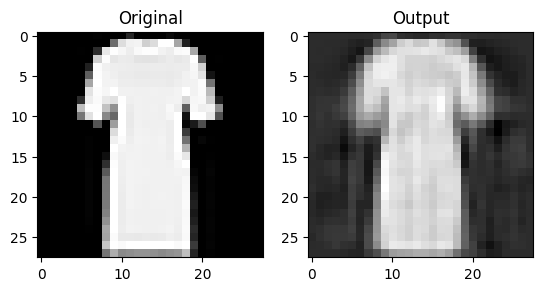

In [169]:
visualizeOutput(124, model1, test_images)

In [183]:
(train_images1, train_labels1), (test_images1, test_labels1) = keras.datasets.cifar10.load_data()

In [184]:
train_images1 = train_images1 / 255
train_targets1 = train_images1.copy()
test_images1 = test_images1 / 255
test_targets1 = test_images1.copy()

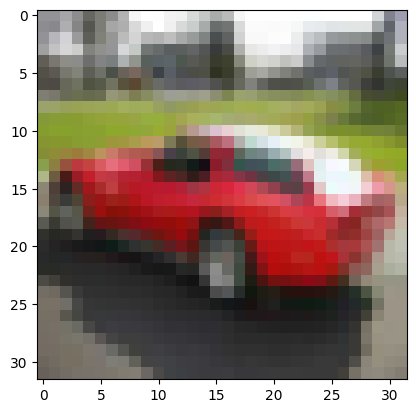

In [185]:
plt.imshow(train_images1[255])

In [186]:
train_images1.shape

(50000, 32, 32, 3)

In [187]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(train_images1, train_targets1, test_size=0.2)

In [188]:
X_train1.shape

(40000, 32, 32, 3)

In [189]:
class autoencoderForCiphar10(keras.models.Model):
    def __init__(self, imgShape, dimension):
        super(autoencoderForCiphar10, self).__init__()
        self.encoder = keras.Sequential([
            keras.layers.Flatten(input_shape=imgShape), 
            keras.layers.Dense(dimension * 4), 
            keras.layers.Dense(dimension * 2)
        ])

        self.decoder = keras.Sequential([
            keras.layers.InputLayer(input_shape=(dimension * 2, )), 
            keras.layers.Dense(dimension * 4), 
            keras.layers.Dense(np.prod(imgShape)), 
            keras.layers.Reshape((imgShape))
        ])
        
    def call(self, inputs):
        encoding = self.encoder(inputs)
        decoding = self.decoder(encoding)
        return decoding

In [190]:
model2 = autoencoderForCiphar10([32, 32, 3], 64)

In [191]:
model2.encoder.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 3072)              0         
                                                                 
 dense_41 (Dense)            (None, 256)               786688    
                                                                 
 dense_42 (Dense)            (None, 128)               32896     
                                                                 
Total params: 819,584
Trainable params: 819,584
Non-trainable params: 0
_________________________________________________________________


In [192]:
model2.decoder.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               33024     
                                                                 
 dense_44 (Dense)            (None, 3072)              789504    
                                                                 
 reshape_13 (Reshape)        (None, 32, 32, 3)         0         
                                                                 
Total params: 822,528
Trainable params: 822,528
Non-trainable params: 0
_________________________________________________________________


In [193]:
model2.compile(optimizer='adam', loss='mse', metrics=keras.metrics.MeanSquaredError())

In [194]:
history = model2.fit(X_train1, y_train1, epochs=10, validation_data=(X_val1, y_val1))

Epoch 1/10
1250/1250 [==============================] - 15s 11ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 2/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0880 - mean_squared_error: 0.0880 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 3/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.0078 - val_mean_squared_error: 0.0078
Epoch 4/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 5/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 6/10
1250/1250 [==============================] - 15s 12ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoc

In [195]:
loss, mse = model2.evaluate(test_images1, test_targets1)
print("loss: ", loss)
print("mse: ", mse)

313/313 [==============================] - 1s 3ms/step - loss: 0.0067 - mean_squared_error: 0.0067
loss:  0.006715171039104462
mse:  0.006715171039104462


1/1 [==============================] - 0s 167ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


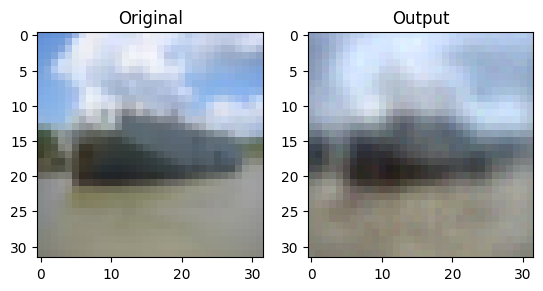

In [196]:
visualizeOutput(124, model2, test_images1)